
Training Random Forest for White Wine...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  


Classification Report for Random Forest - White Wine:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.56      0.20      0.29        25
           5       0.70      0.69      0.70       291
           6       0.66      0.79      0.72       432
           7       0.76      0.58      0.66       192
           8       0.80      0.46      0.58        35

    accuracy                           0.69       980
   macro avg       0.58      0.45      0.49       980
weighted avg       0.69      0.69      0.68       980



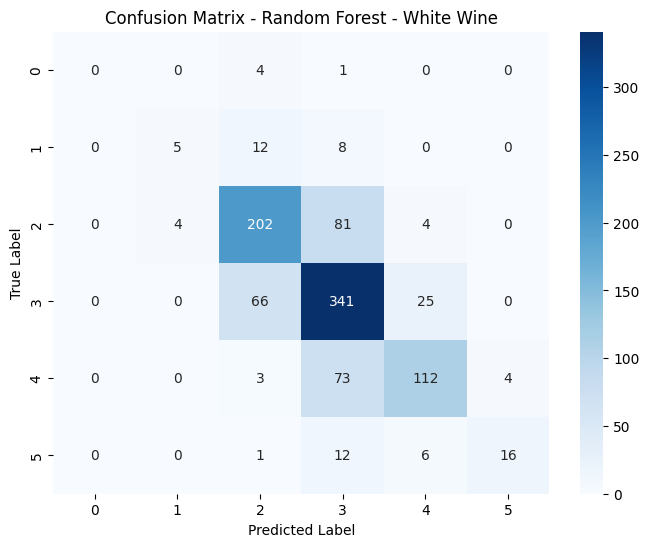


Training SVM for White Wine...

Classification Report for SVM - White Wine:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.50      0.08      0.14        25
           5       0.62      0.57      0.59       291
           6       0.53      0.77      0.62       432
           7       0.65      0.25      0.36       192
           8       0.00      0.00      0.00        35

    accuracy                           0.56       980
   macro avg       0.38      0.28      0.29       980
weighted avg       0.56      0.56      0.53       980



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

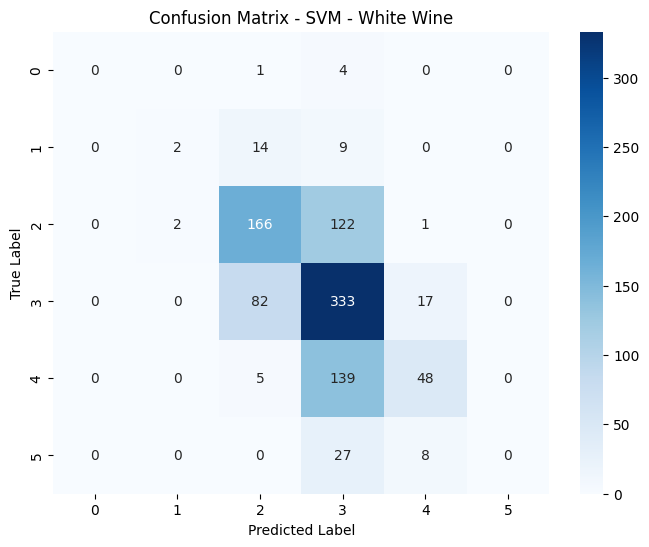


Training XGBoost for White Wine...


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6], got [3 4 5 6 7 8 9]

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Load preprocessed data
with open('preprocessed_data.pkl', 'rb') as f:
    data = pickle.load(f)

# Function to adjust class labels
def adjust_labels(y):
    return y - y.min()

# Adjust labels for both datasets
data['white_wine']['y_train'] = adjust_labels(data['white_wine']['y_train'])
data['white_wine']['y_test'] = adjust_labels(data['white_wine']['y_test'])
data['red_wine']['y_train'] = adjust_labels(data['red_wine']['y_train'])
data['red_wine']['y_test'] = adjust_labels(data['red_wine']['y_test'])

# Function to train and evaluate models
def train_and_evaluate(X_train, X_test, y_train, y_test, wine_type):
    # Initialize models
    models = {
        'Random Forest': RandomForestClassifier(random_state=42),
        'SVM': SVC(random_state=42),
        'XGBoost': xgb.XGBClassifier(random_state=42)
    }
    
    results = {}
    
    for name, model in models.items():
        print(f"\nTraining {name} for {wine_type}...")
        
        # Train model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        results[name] = {
            'model': model,
            'predictions': y_pred,
            'report': classification_report(y_test, y_pred)
        }
        
        # Print classification report
        print(f"\nClassification Report for {name} - {wine_type}:")
        print(results[name]['report'])
        
        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {name} - {wine_type}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()
    
    return results

# Train models for white wine
white_results = train_and_evaluate(
    data['white_wine']['X_train'],
    data['white_wine']['X_test'],
    data['white_wine']['y_train'],
    data['white_wine']['y_test'],
    'White Wine'
)

# Train models for red wine
red_results = train_and_evaluate(
    data['red_wine']['X_train'],
    data['red_wine']['X_test'],
    data['red_wine']['y_train'],
    data['red_wine']['y_test'],
    'Red Wine'
)